# Projet numérique de science des données - JAMET François et HOUITTE DE LA CHESNAIS Donatien

## Introduction au projet

Il s'agit de construire un modèle prédisant le type de couvert végétal d'une parcelle de forêt (carré de 30m x 30m) à partir d'informations cartographiques décrivant cette parcelle.

Le but final sera d'appliquer ce modèle pour faire des prédictions pour des données pour lesquelles vous ne disposez pas d'une étiquette. __La note finale portera largement plus sur votre démarche (notebook et ses commentaires) que sur la qualité de vos prédictions.__ 

__Consignes :__ 
* Déclarez votre binôme en vous inscrivant dans un groupe de rendu de projet [sur Moodle](https://moodle.psl.eu/course/view.php?id=22890) afin de récupérer le fichier pour lequel vous devrez faire des prédictions.
* Vous devrez rendre, par groupe de projet :
    * un notebook jupyter
    * un fichier de prédictions (voir plus bas pour le format)
* __Renseignez vos noms & prénoms__ dans le titre du notebook
* Vous avez jusqu'au __5 juillet midi heure de Paris__
* Déposez vos fichiers [sur Moodle](https://moodle.psl.eu/course/view.php?id=22890) dans la section dédiée (un seul rendu par binôme est nécessaire).

__Déroulé :__
* Les séances du lundi 17/06 (10h45-12h15) et lundi 01/07 (10h45-12h15) sont dédiées au projet numérique. Faites-en bon usage.
* Certaines sections font appel à des notions qui n'auront pas encore été vues le 17/06 ; c'est indiqué le cas échéant.

## Données

### Description des données 
Le dossier `data/` contient un jeu de données nommé `couvert_vegetal_public.tsv`. Il contient les données étiquetées à partir desquelles construire votre modèle.

Chaque ligne dans les données correspond à un carré de 30 m x 30m, décrit par les variables suivantes :
* variables continues :
  * `altitude` : altitude en mètres
  * `pente` : pente en degrés
  * `distance_horizontale_hydro` : distance horizontale au point d'eau le plus proche (en mètres)
  * `distance_verticale_hydro` : distance verticale au point d'eau le plus proche (en mètres)
  * `distance_horizontale_route` : distance horizontale à la route la plus proche (en mètres)
  * `ombrage_0900` : index d'ombrages à 9h du matin, au solstice, sur une échelle de 0 à 255
  * `ombrage_1200` : index d'ombrages à midi, au solstice, sur une échelle de 0 à 255
  * `ombrage_1500` : index d'ombrages à 15h, au solstice, sur une échelle de 0 à 255
  * `distance_horizontale_depart_feu` : distance horizontale au départ de feu de forêt le plus proche (en mètres)
* variables binaires
  * `zone_A` : 0 ou 1, selon si la parcelle appartient à une zone géographique A ou non
  * `couvert` (étiquette) : nature du couvert végétal (0 = sapin ou épicéa ; 1 = pin tordu)

### Chargement des données étiquetées

In [349]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [350]:
import pandas as pd

In [351]:
df_public = pd.read_csv('data/couvert_vegetal_public.tsv', delimiter='\t')

In [352]:
df_public.head()

,altitude,pente,distance_horizontale_hydro,distance_verticale_hydro,distance_horizontale_route,ombrage_0900,ombrage_1200,ombrage_1500,distance_horizontale_depart_feu,zone_A,couvert
0,2859,16,739,127,150,175,228,192,1590,0,1
1,3024,8,42,4,1261,205,246,179,957,0,1
2,3057,9,295,68,2581,198,230,171,1959,0,1
3,2802,12,120,14,446,240,223,112,2582,0,1
4,2880,20,190,71,1317,194,254,193,2698,0,1


### Visualisation des variables

#### Question 1
Visualisez chacun des descripteurs (_features_) sous la forme de deux histogrammes superposés (grâce à [pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)), l'un correspondant aux observations de la classe positive, l'autre correspondant aux observations de la classe négative

__Conseils :__
* utilisez `df_public.loc[df_public["couvert"]==1]` pour obtenir les lignes de `df_public` pour lesquelles `couvert` vaut `1`.
* utilisez l'argument `alpha` de `plt.hist` pour rendre vos histogrammes transparents.

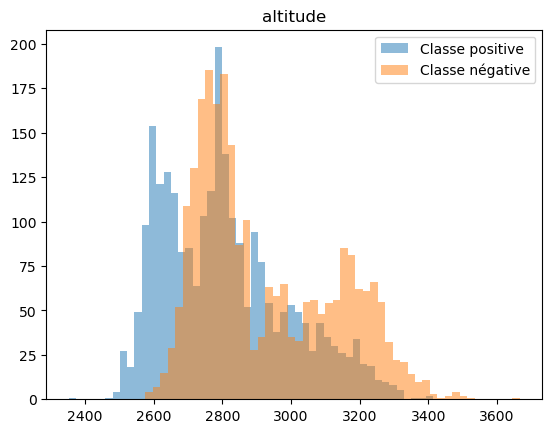

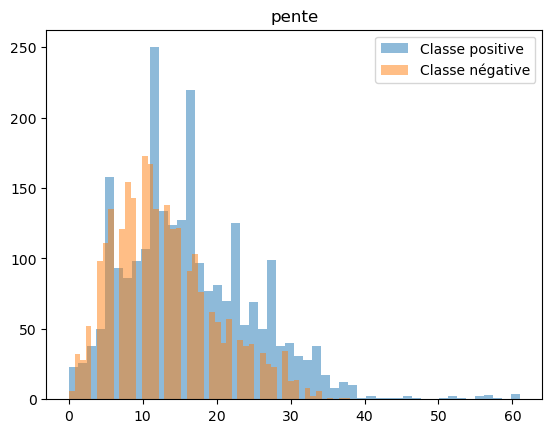

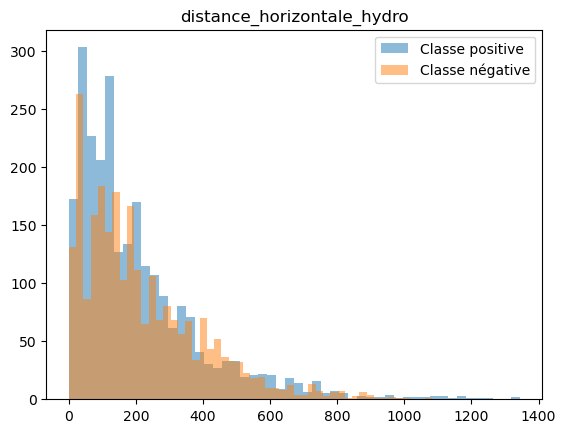

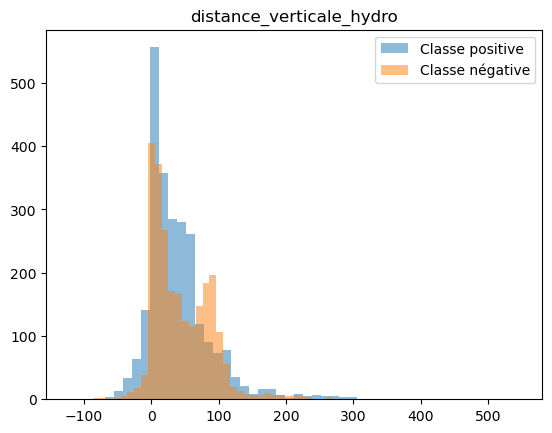

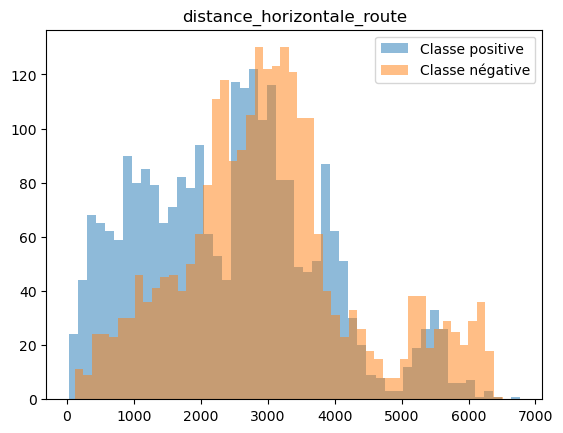

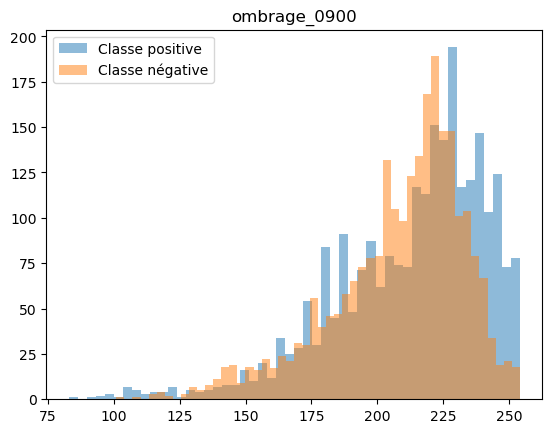

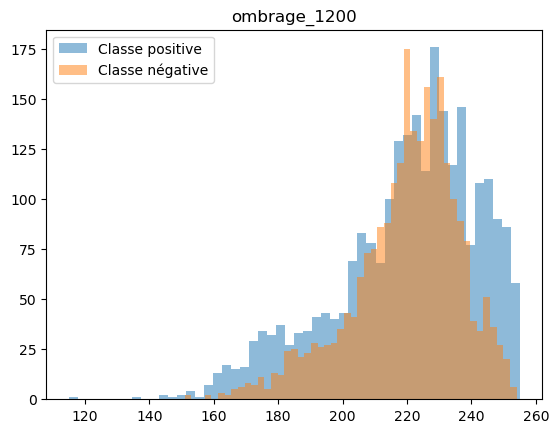

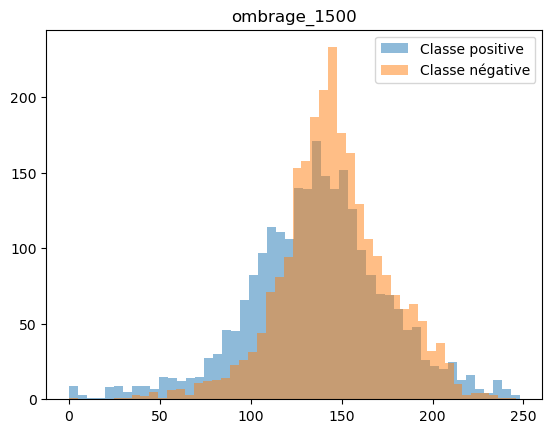

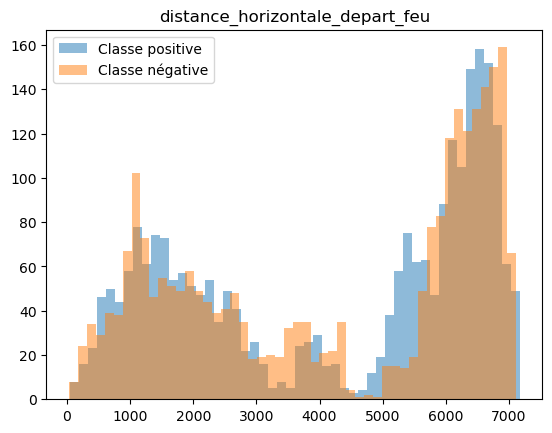

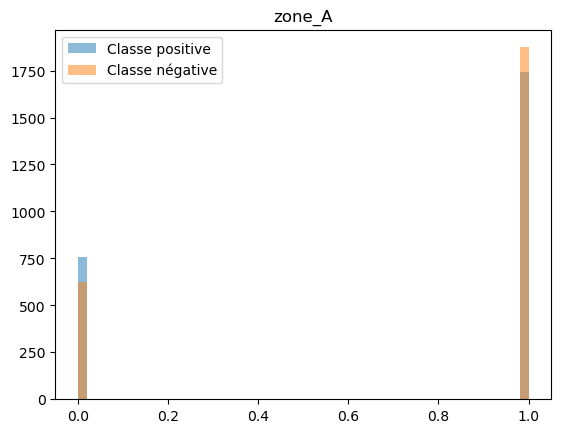

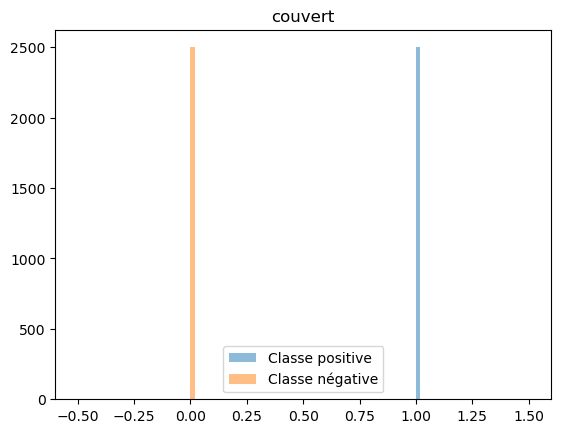

In [353]:
df_public_1 = df_public.loc[df_public["couvert"]==1].copy()
df_public_0 = df_public.loc[df_public["couvert"]==0].copy()
for features in df_public.columns:
    plt.hist(df_public_1[features],50, alpha=0.5, label = 'Classe positive')
    plt.hist(df_public_0[features],50, alpha=0.5, label = 'Classe négative')
    plt.title(features)
    plt.legend()
    plt.show()

#### Question 2
Pensez-vous qu'il va être aisé de distinguer les deux classes ?

#### Réponse 2
Il va être plutôt compliqué de distinguer les deux classes car quelle que soit la caractéristique étudiée (altitude, pente,...), les deux histogrammes se superposent quasiment exactement. Autrement dit, les deux classes sont quasiment identiques en termes d'altitude, de pente... IL n'existe aucun critère discriminant pour lequel les deux classes ne se ressemblerait pas et qui permetrait de les distinguer à coup sûr, sauf le couvert évidemment.

### Visualisation en 2D

Commençons par extraire la matrice de design `X_public` (numpy.array) de `df_public` :

In [354]:
# Extraction de la matrice de design
X_public = np.array(df_public.drop(columns=["couvert"]))

#### Question 3
a) Utilisez une ACP pour visualiser les données en deux dimensions. Plus précisément : utilisez une ACP des descripteurs (_features_) pour représenter les observations sous la forme d'un nuage de points en 2D, et colorez les points selon leur étiquette.

b) À quelle point cette ACP est-elle une représentation fidèle des données ? 

c) Pensez-vous maintenant qu'il va être aisé de distinguer les deux classes ? Pourquoi ?

In [355]:
from sklearn import preprocessing
from sklearn import decomposition

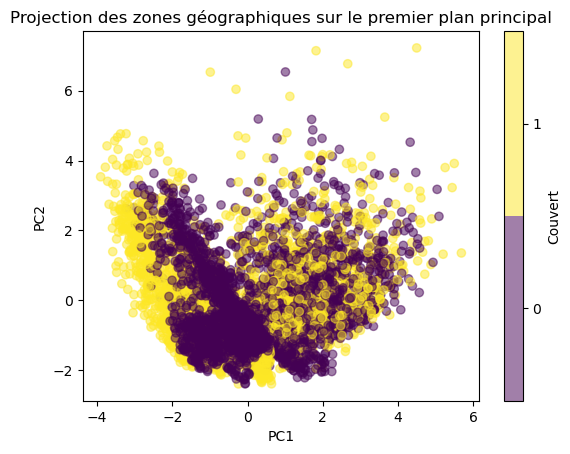

In [356]:
# 3.a
std_scale = preprocessing.StandardScaler().fit(X_public)
X_scaled = std_scale.transform(X_public)

pca = decomposition.PCA(n_components=10)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_public["couvert"], alpha=0.5)
plt.colorbar(ticks=[0, 1], label='Couvert', boundaries=[-0.5, 0.5, 1.5])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des zones géographiques sur le premier plan principal')

plt.show()

Text(0, 0.5, 'Proportion cumulée de variance expliquée')

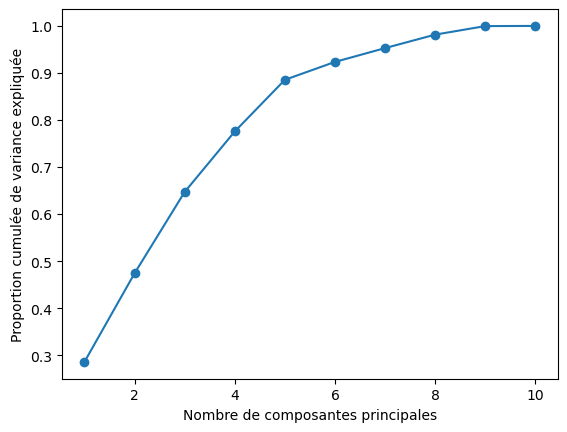

In [357]:
# 3.b
propcum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(np.arange(1, 11), propcum, marker='o')

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion cumulée de variance expliquée")

#### Réponse 3.b
Les deux premières composantes principales de l'ACP expliquent 50% du problème. On n'aura donc pas une représentation très précise du problème à l'aide de ces deux composantes.

#### Réponse 3.c
La représentation en projection sur le premier plan principal montre des points qui se mélangent sur une même zone centrale. On ne peut donc pas aisément distinguer les deux classes. Il aurait fallu pour cela avoir deux zones de points distinctes sur le graphique, correspondant respectivement aux deux classes.

## [À partir de la PC 3] Apprentissage supervisé

Nous allons maintenant avoir besoin du vecteur d'étiquettes `y_public` sous forme d'array numpy :

In [358]:
y_public = np.array(df_public["couvert"])

### Quantification des performances

Il existe de nombreux scores permettant d'évaluer les performances d'un algorithme de classification. Toutes celles implémentées dans scikit-learn sont listées [ici](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

Dans ce projet, nous allons utiliser la **proportion d'observations correctement classifiées**, ou _accuracy_ en anglais (à ne pas confondre avec la _precision_). Elle est implémentée par [metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) dans scikit-learn.

#### Question 4

a) Quel serait sur nos données l'accuracy d'un modèle naïf prédisant systématiquement la classe 1 ?

b) Supposons maintenant que le jeu de données sur lequel on évalue ce même modèle naïf comporte 9 fois plus d'exemples de la classe 1 que de la classe 0 (90% de `1`, 10% de `0`). Quel serait alors son accuracy ?

c) Quelle serait la [balanced accuracy](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score) du modèle naïf sur le jeu de données de la question b) ?

In [359]:
# 4.a
from sklearn.metrics import accuracy_score
n = len(y_public)
y_pred = np.array(n*[1])
print(accuracy_score(y_public, y_pred))

0.5


### Réponse 4.a

Pour un tel modèle, l'accuracy serait donc de 50 %

### Réponse 4.b

Si l'on évaluait le modèle naïf sur un tel jeu de données, l'accuracy serait donc de 90 %

In [360]:
# 4.b, vérification numérique
Accuracy = []
for i in range(1000): # Le résultat dépend des postions choisies à la ligne en dessous: on fait la moyenne de 1000 accuracy pour réduire le cracartère aléatoire
    Pos = np.random.randint(0,n,int(n/10)) # On détermine aléatoirement les "positons" des des exemples de la classe 0
    y_pred = np.array(n*[1])
    y = np.array(n*[1])
    for j in Pos:
        y[j]=0
    Accuracy.append(accuracy_score(y, y_pred))
accuracy = sum(Accuracy)/1000
print(accuracy)

0.9048179999999986


### Réponse 4.c

On calcule la _balanced accuracy_:

$$ \text{balanced-accuracy} = \frac{1}{2} \times \Big( \displaystyle \frac{\text{True}(1)}{\text{True}(1)+\text{False}(0)} + \frac{\text{True}(0)}{\text{True}(0)+\text{False}(1)} \Big) $$

c'est-à-dire:

$$ \text{balanced-accuracy} = \frac{1}{2} \times \Big( \displaystyle \frac{9}{9+0} + \frac{0}{0+1} \Big) = 0.5 $$

In [361]:
# 4.c, vérification numérique
from sklearn.metrics import balanced_accuracy_score
Balanced_Accuracy = []
for i in range(1000): # Le résultat dépend des postions choisies à la ligne en dessous: on fait la moyenne de 1000 accuracy pour réduire le cracartère aléatoire
    Pos = np.random.randint(0,n,int(n/10)) # On détermine aléatoirement les "positons" des des exemples de la classe 0
    y_pred = np.array(n*[1])
    y = np.array(n*[1])
    for j in Pos:
        y[j]=0
    Balanced_Accuracy.append(balanced_accuracy_score(y, y_pred))
balanced_accuracy = sum(Balanced_Accuracy)/1000
print(balanced_accuracy)

0.5


### Algorithme des 7 plus proches voisins

Nous n'avons pas encore vu d'algorithme permettant d'entraîner un modèle de classification. Nous allons donc commencer avec un modèle simple : celui des __k plus proches voisins__ (ou __kNN__, pour _k nearest neighbors_).

Dans ce modèle, la valeur de la fonction de décision en x est la proportion d'individus d'étiquette positive parmi les k plus proches voisins de x au sein des points du jeu d'entraînement ; k est fixé.

Nous allons commencer par utiliser un algorithme des k plus proches voisins avec k fixé à k=7.

#### Question 5

a) Utilisez la classe `KNeighborsClassifier` du module `neighbors` de `sklearn` pour entraîner un modèle avec l'algorithme des 7 plus proches voisins sur les données `(X_public, y_public)`.

Documentation : [sklearn.neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

b) Quelle est l'accuracy de ce modèle sur le jeu ayant servi à l'entraîner ?

In [362]:
from sklearn import metrics, neighbors

In [363]:
# 5.a

# On entraîne un classifieur kNN à 7 voisins
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_public, y_public)

# On prédit les étiquettes des données d'apprentissage
y_pred = knn.predict(X_public)

# 5.b

# Calcul de l'accuracy
print("Accuracy :", metrics.accuracy_score(y_public, y_pred))

Accuracy : 0.918


### Réponse 5.b

L'accuracy de ce modèle sur le jeu ayant servi à l'entraîner est de 0.918

#### Pré-traitement des données

#### Question 6

Les variables du jeu de données prennent des valeurs sur des échelles différentes (voir par exemple `pente` vs `distance_horizontale_route` vs `zone_A`).

a) Quel effet cela peut-il avoir sur le calcul des plus proches voisins ?

b) Proposez et implémentez un pré-traitement permettant de remédier à ce problème : créez une nouvelle représentation des données publiques `X_public_preprocessed`, entraînez un algorithme des 7 plus proches voisins, et évaluez sa performance sur le jeu d'entraînement. 

### Réponse 6.a
Le calcul des plus proches voisins est basé sur la distance entre les points. Si les variables ne sont pas sur la même échelle, alors la distance entre les points ne sera pas pertinente, car un ordre de grandeur de proche distance sur une variable peut être l'ordre de grandeur d'une petite distance pour une autre variable. Il est donc nécessaire de normaliser les variables pour que la distance entre les points soit pertinente.

In [364]:
# 6.b

# Calcul de la nouvelle représentation des données publiques
X_public_preprocessed = pca.transform(std_scale.transform(X_public))

# Entrainement de l'algorithme des 7 plus proches voisins
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_public_preprocessed, y_public)

# Prédiction des étiquettes des données publiques
y_public_pred = knn.predict(X_public_preprocessed)

# Evaluation de la performance
print("Accuracy :", metrics.accuracy_score(y_public, y_public_pred))

Accuracy : 0.9066


### Réponse 6.b

L'accuracy a baissé avec le pré-traitement des données, ce qui est _a priori_ très surprenant car on s'attendait à ce qu'elle augmente !

### [À partir de l'Amphi 6 / PC4] Mise en place d'une validation croisée 

### Question 7

Nous allons maintenant mettre en place une procédure de validation croisée pour évaluer/comparer différents modèles. Plus précisément, nous fixons le découpage du jeu de données en 5 _folds_, que nous réutiliserons pour chaque évaluation dans ce qui suit :

In [365]:
from sklearn import model_selection

In [366]:
# 7

n_folds = 5
kf = model_selection.KFold(n_splits=n_folds, shuffle=True, random_state=42)
kf.get_n_splits(X_public_preprocessed)
print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


### Algorithme des k plus proches voisins

#### Question 8 

a) Utilisez `kf` pour évaluer l'accuracy en validation croisée de l'algorithme des 7 plus proches voisins. 

b) Comparez à l'accuracy obtenue sur le jeu d'entraînement ; commentez.

In [367]:
from sklearn.model_selection import cross_val_score

In [368]:
# 8.a 

# Évaluation de l'accuracy en utilisant la validation croisée
accuracy_scores = cross_val_score(knn, X_public_preprocessed, y_public, cv=kf)

# Affichage les scores d'accuracy pour chaque fold
for fold, accuracy in enumerate(accuracy_scores):
    print(f"Fold {fold+1}: Accuracy = {accuracy}")

# Calcul de l'accuracy moyenne sur tous les folds
mean_accuracy = accuracy_scores.mean()
print(f"Accuracy moyenne : {mean_accuracy}")

Fold 1: Accuracy = 0.864
Fold 2: Accuracy = 0.834
Fold 3: Accuracy = 0.886
Fold 4: Accuracy = 0.851
Fold 5: Accuracy = 0.861
Accuracy moyenne : 0.8592000000000001


### Réponse 8.b
On obtient une accuracy moyenne en validation croisée plus faible que sans validation croisée. Cela s'explique par le fait que l'on n'utilise que 80% des données pour entraîner le modèle, et donc que le modèle est moins performant. Par ailleurs, on n'évalue pas le modèle sur les mêmes données que celles sur lesquelles il a été entraîné donc l'accuracy est plus faible.

#### Question 9

a) Évaluez la performance en validation croisée de l'algorithmes des k plus proches voisins, pour k variant de 1 à 19. Faites un graphe pour présenter les résultats.

b) Quelle valeur de k sélectionner pour faire des prédictions sur de nouvelles données ?

In [369]:
# 9.a

# On fait varier k de 1 à 19
accuracy = []
for k in range (1,20) :
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    accuracy_scores = cross_val_score(knn, X_public_preprocessed, y_public, cv=kf)
    mean_accuracy = accuracy_scores.mean()
    accuracy.append(mean_accuracy)

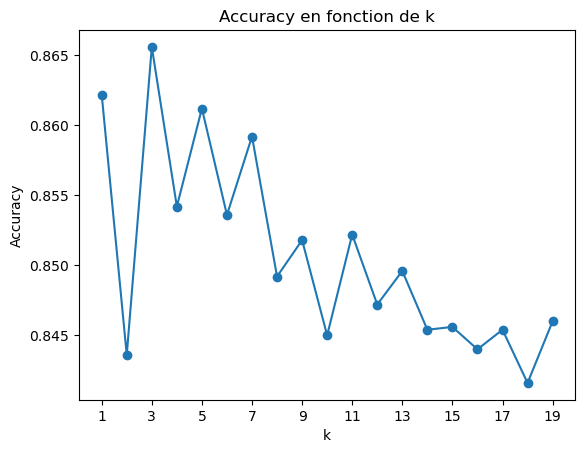

Le meilleur k est 3 pour une accuracy de 0.8656


In [370]:
# Tracé de l'accuracy en fonction de k
plt.plot(range(1, 20), accuracy, marker='o')
plt.xticks(range(1, 20, 2))
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de k')
plt.show()

meilleur_k = np.argmax(accuracy)+1

print(f'Le meilleur k est {meilleur_k}', f'pour une accuracy de {accuracy[meilleur_k-1]}' )

### Réponse 9.b

La valeur de k qui maximise l'accuracy en validation croisée est 3. On choisira donc k=3 pour faire des prédictions sur de nouvelles données.

### Modèle linéaire 

#### Question 10

Évaluez l'accuracy en validation croisée d'une régression logistique sur le jeu d'entraînement. Sélectionnez le ou les hyperparamètres pertinents si nécessaire.

Comparez à l'accuracy du modèle de k plus proches voisins.

Documentation : [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [371]:
from sklearn import linear_model

In [372]:
# 10

# Entrainement d'une régression logistique
logreg = linear_model.LogisticRegression()
logreg.fit(X_public_preprocessed, y_public)

# Evaluation de l'accuracy en validation croisée
accuracy_scores = cross_val_score(logreg, X_public_preprocessed, y_public, cv=kf)

# Affichage les scores d'accuracy pour chaque fold
for fold, accuracy in enumerate(accuracy_scores):
    print(f"Fold {fold+1}: Accuracy = {accuracy}")

# Calcul de l'accuracy moyenne sur tous les folds
mean_accuracy = accuracy_scores.mean()
print(f"Accuracy moyenne : {mean_accuracy}")


Fold 1: Accuracy = 0.778
Fold 2: Accuracy = 0.774
Fold 3: Accuracy = 0.765
Fold 4: Accuracy = 0.787
Fold 5: Accuracy = 0.755
Accuracy moyenne : 0.7718


### Réponse 10
On utilise les données `X_public_preprocessed` car ces donées sont a priori plus adaptées. L'accuracy est meilleure pour k=3 plus proches voisins qu'en régression logistique (0,8656 contre 0,7718 en moyenne). On choisit une régularisation l2 (par défaut dans `LogisticRegression`) car on effectue ici un test en validation croisée. Autrement dit, on évalue le modèle sur un jeu de validations différentes du jeu d'entrainement : pour obtenir une meilleure performance, il faut éviter le surapprentissage via cette régularisation.

### [À partir de l'Amphi 8] Modèle non-linéaire

#### Question 11

Choisissez un algorithme permettant d'apprendre un modèle de classification non-linéaire.

Évaluez son accuracy en validation croisée sur le jeu d'entraînement. Sélectionnez le ou les hyperparamètres pertinents si nécessaire.

Comparez aux accuracies obtenues jusqu'à présent.

### Réponse 11

On entraîne dans un premier temps un perceptron puis dans un deuxième temps, nous étudierons une régression polynomiale.

In [373]:
# 11 Perceptron

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

clf = Perceptron(fit_intercept = False, random_state=42)
accuracy_scores = cross_val_score(clf, X_public_preprocessed, y_public, cv=kf)
mean_accuracy = accuracy_scores.mean()
print(f"Accuracy du perceptron: {mean_accuracy}")

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 10), max_iter=300, random_state=42)
accuracy_scores_mlp = cross_val_score(mlp, X_public_preprocessed, y_public, cv=kf)
mean_accuracy_mlp = accuracy_scores_mlp.mean()
print(f"Accuracy du perceptron multi-couches: {mean_accuracy_mlp}")

Accuracy du perceptron: 0.6613999999999999


Accuracy du perceptron multi-couches: 0.89


In [382]:
# 11 Régression polynomiale

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# On fait des rgéressions polynomiales de degrés 1 à 6.
for d in range(1,5):
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)

    X_public_preprocessed_polynomial = polynomial_features.fit_transform(X_public_preprocessed)
    reg = LogisticRegression(max_iter = 10000)
    reg.fit(X_public_preprocessed_polynomial, y_public)
    
    accuracy_scores = cross_val_score(reg, X_public_preprocessed_polynomial, y_public, cv=kf)
    mean_accuracy = accuracy_scores.mean()

    # Affichage des scores d'accuracy pour chaque degré
    print(f"Degré {d}: Accuracy = {mean_accuracy}")

Degré 1: Accuracy = 0.7718
Degré 2: Accuracy = 0.8054


Degré 3: Accuracy = 0.8368
Degré 4: Accuracy = 0.8612


### Choix du modèle final

#### Question 12
Étant donné le travail mené jusqu'à présent :

a) Quel algorithme d'apprentissage, avec quel(s) hyperparamètres, choisissez-vous pour apprendre votre modèle final ? 

b) Utilisez cet algorithme avec cet/ces hyperparamètres pour entraîner un  modèle `predictor_final` sur l'ensemble des données étiquetées. N'oubliez pas le pré-traitement si nécessaire.

### Réponse 12.a

On choisit comme modèle final un perceptron multi-couches avec deux couches intermédiaires contenant chacune respectivement 100 neurones et 10 neurones car c'est pour ce modèle que l'accuracy était maximale (nous avons réalisé des essais -non détaillés dans le notebook - avec des nombres différents de couches intermédiaires et de neurones par couche mais l'accuracy était alors plus faible).

In [383]:
#12.b

predictor_final = MLPClassifier(hidden_layer_sizes=(100, 100, 10), max_iter=300, random_state=42)

# Entrainement du modèle
predictor_final.fit(X_public_preprocessed, y_public)

MLPClassifier(hidden_layer_sizes=(100, 100, 10), max_iter=300, random_state=42)

## Prédictions

Vous recevrez après avoir déclaré votre binôme un jeu de données nommé `couvert_vegetal_prive_<n>.tsv` (ou `<n>` sera un numéro arbitraire). Il contient les données non-étiquetées, pour lesquelles faire vos prédictions. Le format est le même que pour `couvert_vegetal_public.tsv`, à l'exception de la variable `couvert`, que vous devrez prédire.

### Charger les données

Vous pouvez maintenant charger le jeu de données externe (en remplaçant `1` par le bon numéro) :

In [384]:
df_private = pd.read_csv('data/couvert_vegetal_prive_5.tsv', delimiter='\t')
X_private = np.array(df_private)

### Prédictions

#### Question 13
Utilisez `predictor_final` pour prédire les étiquettes des observations de `X_private`.  N'oubliez pas le pré-traitement si nécessaire. Enregistrez le résultat dans un array `y_pred_final`.

In [385]:
# Pré-traitement des données
X_private_scaled = pca.transform(std_scale.transform(X_private))

# Prédiction des résultats
y_pred_final = predictor_final.predict(X_private_scaled)

Vous pouvez maintenant utiliser le code suivant pour générer votre fichier de prédictions :

In [386]:
np.savetxt("test_file.tsv", 
           y_pred_final,
           fmt=('%d'), 
           header='Prediction',
           delimiter='\t', comments="")

__Attention !__ Si vous ouvrez ce fichier avec un programme externe type Microsoft Excel ou LibreOffice Calc pour le lire, il est possible que ce programme modifie le fichier sans que vous ne le réalisiez. Préférez utiliser un éditeur de texte simple, ou une commande bash type `less` ou `cat` ; ou alors assurez-vous de relancer la commande avant de soumettre vos prédictions.

## Pour aller plus loin

#### Bonus 1

Ajoutez le jeu de test à la visualisation de la question 3. Pensez-vous que les performances de votre modèle sur le jeu de test vont être
* aussi bonnes qu'en validation croisée sur le jeu d'entraînement ?
* meilleures ?
* moins bonnes ?

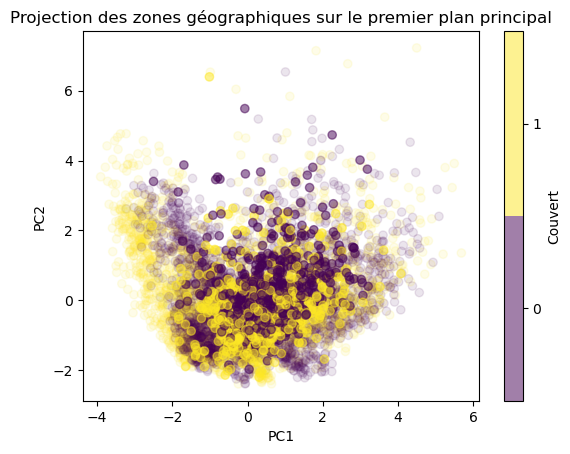

In [387]:
# Projection des données du jeu de test
X_private_scaled = std_scale.transform(X_private)
pca = decomposition.PCA(n_components=2)
pca.fit(X_private_scaled)
X_private_projected = pca.transform(X_private_scaled)

plt.figure()
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df_public["couvert"], alpha=0.1)
plt.scatter(X_private_projected[:, 0], X_private_projected[:, 1], c=y_pred_final, alpha=0.5)
plt.colorbar(ticks=[0, 1], label='Couvert', boundaries=[-0.5, 0.5, 1.5])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des zones géographiques sur le premier plan principal')

plt.show()

### Réponse Bonus 1

Les données de test sont encore plus en paquet au centre de la représentation suivant les deux premières composantes principales que les données d'entraînement. Elles ne suivent même pas la séparations que l'on peut observer dans la partie gauche du graphe.

Les performances de notre modèle seront donc moins bonnes qu'en validation croisée sur le jeu d'entrainement.

# A COMPLETER SACHANT LES VALEURS DE COUVERT

#### Bonus 2
La plupart des modèles de classification binaire retournent la valeur 0 ou 1 après seuillage d'un score qui est d'autant plus élevé que la probabilité que l'étiquette soit 1 est grande. (Certains algorithmes, comme la régression logistique, modélisent directement cette probabilité. D'autres, comme les SVM, retournent un score qui peut dépasser 1.) 

Ainsi peut se poser la question du choix du seuil à utiliser (par défaut, 0.5 quand on modélise une probabilité).

La **courbe ROC** fait partie des outils qui permettent de visualiser la performance d'un modèle _pour tous les seuils possibles_.
    
Dans scikit-learn, les méthodes `predict_proba()` retournent des prédictions non seuillés, tandis que les méthodes `predict()` retournent des prédictions binaires obtenues après seuillage. L'affichage des courbes ROC se fait grâce au module [metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html).

Affichez (sur le même graphique) et comparez les courbes ROC pour les prédictions en validation croisée obtenues pour les différents modèles.

### Réponse Bonus 2

Les modèles que l'on peut comparer sont :
* le modèle des 7 plus proches voisins
* le modèle de régression logistique
* le modèle non-linéaire polynômial
* le modèle du perceptron

In [388]:
# Liste des résultats des modèles en validation croisée construits précédemment
y_pred_knn = knn.predict(X_public_preprocessed)
y_pred_logreg = logreg.predict(X_public_preprocessed)
y_pred_polynomial = 
y_pred_perceptron = clf.perceptron.predict(X_public_preprocessed)

y_pred = np.array([y_pred_knn, y_pred_logreg, y_pred_polynomial, y_pred_perceptron])
models = ['knn', 'logreg', 'polynomial', 'perceptron']

# Affichage des courbes ROC sur un même graphique
plt.figure()

for i in range(4):
    fpr, tpr, _ = metrics.roc_curve(y_public, y_pred[i])
    plt.plot(fpr, tpr, label=models[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC')
plt.legend()

plt.show()

SyntaxError: invalid syntax (1168290303.py, line 4)

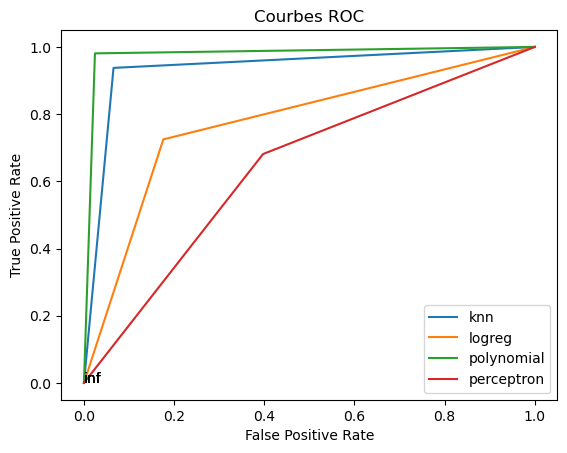

In [ ]:
# Modèles à tester sur les données publiques en utilisant la validation croisée
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
logreg = linear_model.LogisticRegression()
clf = Perceptron(fit_intercept = False, random_state=42)
reg = linear_model.LogisticRegression(max_iter = 10000)

# Pré-traitement des données
X_public_preprocessed_polynomial = polynomial_features.fit_transform(X_public_preprocessed)

# Entrainement des modèles
knn.fit(X_public_preprocessed, y_public)
logreg.fit(X_public_preprocessed, y_public)
clf.fit(X_public_preprocessed, y_public)
reg.fit(X_public_preprocessed_polynomial, y_public)

# Liste des prédictions des modèles en validation croisée construits précédemment
y_pred_knn = knn.predict(X_public_preprocessed)
y_pred_logreg = logreg.predict(X_public_preprocessed)
y_pred_polynomial = reg.predict(X_public_preprocessed_polynomial)
y_pred_perceptron = clf.predict(X_public_preprocessed)

y_pred = np.array([y_pred_knn, y_pred_logreg, y_pred_polynomial, y_pred_perceptron])
models = ['knn', 'logreg', 'polynomial', 'perceptron']

# Affichage des courbes ROC sur un même graphique
plt.figure()

for i in range(4):
    fpr, tpr, thresholds = metrics.roc_curve(y_public, y_pred[i])
    plt.plot(fpr, tpr, label=models[i])
    for j, threshold in enumerate(thresholds):
        if j % 10 == 0:
            plt.text(fpr[j], tpr[j], f"{threshold:.2f}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC')
plt.legend()

plt.show()

#### Bonus 3

Pour aller plus loin dans la visualisation des données :
* visualisez plus de 2 composantes principales, toujours par paires (PC3 vs PC1, PC3 vs PC2, etc.). Les classes vous semblent-elles facilement séparables ?
* visualisez et interprétez la contribution de chacune des variables à chaque composante principale. 

In [ ]:
# On visualise toutes les composantes principales 

#### Bonus 4

Utilisez d'autres algorithmes non-linéaires.